In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This MNIST dataset consists of 28 by 28 pixels images, so total pixels are 28*28 which is 784, each pixel is stored as a column, first column is label so total 785 columns. There are total 42000 images so 42000 rows.

In [2]:
# df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16863,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

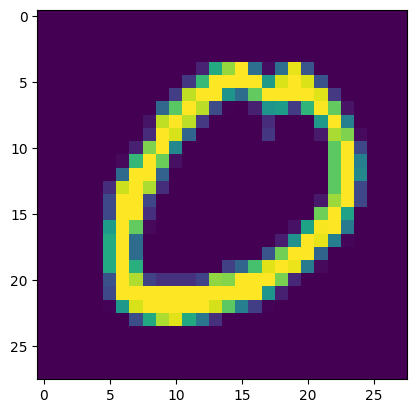

In [6]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))
# imshow is to plot the Image
# selected all pixels of 13051 image and reshaped it to 28 by 28 image 

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

13.53453516960144


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

Using PCA to get same accuracy but with less columns(we reduce the no of columns with PCA)

In [15]:
#mean centering the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [18]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [19]:
X_train_trf.shape

(33600, 200)

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test_trf)

In [23]:
accuracy_score(y_test,y_pred)

0.9503571428571429

In [ ]:
#finding the best no of principle components to get highest accuracy
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

#use the no of principle components that gives the highest accuracy score
#which is grater than or close to the accuracy that we got when we didn't
#use PCA.
    

In [24]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
#now every image will have only two dimensions(two columns)

In [25]:
X_train_trf

array([[-2.71864459, -0.48985832],
       [-0.67698042, -6.75350579],
       [-3.03322675,  6.50987039],
       ...,
       [ 2.14884876,  0.78091355],
       [ 1.05955751,  0.94754919],
       [17.70258175,  1.96155198]])

In [26]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [27]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
X_train_trf

array([[-2.71856266, -0.49024162,  1.13403243],
       [-0.67708739, -6.75295849, -2.33341465],
       [-3.0332303 ,  6.50981045,  7.49160269],
       ...,
       [ 2.14874288,  0.7813373 , -0.74553825],
       [ 1.05975173,  0.94666043,  3.94568641],
       [17.70266221,  1.96158631, -4.94504082]])

In [29]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [30]:
pca.explained_variance_
# Eigen values

array([40.67111197, 29.17023367, 26.74459239])

In [31]:
pca.components_.shape
# Eigen vectors
# Using these eigen vectors we transform all the points by it happens 
# automatically when we fit transfrom

(3, 784)

##### what is the optimum(best) number of principle components that gives highest accuracy 

- Every eigen value tells hows much its correspoinding eigen vector explains the variance of orginal data 
- We have to convert it to percentage
- Divide each eigen vector by sum of all eigen vectors and multiply by 100 to find percentage.
- We have to take the no of components that gives sum as 90%
- If we get 90% or more variance explained ratio we get good results

In [32]:
pca.explained_variance_ratio_
# this gives the percentage of variance explained by each each eigen vector on
#  original data. It only gives ration, if we wnat percentage we can multiply the
#  result with 100

array([0.05785192, 0.0414927 , 0.03804238])

In [33]:
# doing pca again 
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [34]:
pca.explained_variance_.shape

(784,)

In [35]:
pca.components_.shape

(784, 784)

In [36]:
np.cumsum(pca.explained_variance_ratio_)
# calculating cumulative sum 

<IPython.core.display.Javascript object>

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

<IPython.core.display.Javascript object>

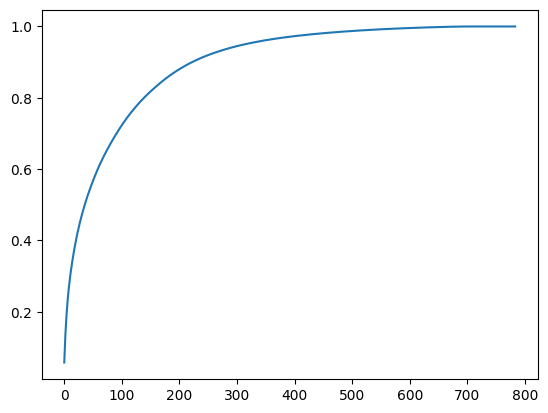

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

from the plot we can see that 90% variance is acehived at 250 components